In [1]:
# Inverted Pendulum example

In [2]:
from IPython.display import Image
import sys 
import os
sys.path.append(os.path.abspath("../PyroBot"))
from pyro_derivatives import *
from pyro_dynamics import *
from pyro_expressions import *
from pyro_kinematics import *
from pyro_animation import *
init_printing(use_unicode=True)
#init_printing(use_latex=True)

In [3]:
from sympy import *
from sympy.physics.mechanics import *
from sympy import symbols, atan, Matrix, solve
from IPython.display import Image, HTML, display_pretty, display_html, display_jpeg, display_png, display_json, display_latex, display_svg

## Model
![Pendulum Model](pendulum.png)

In [4]:
# Declaring variables
q1, q2 = dynamicsymbols('q1:3')
t = symbols('t')
M,l,m,I,g = symbols('M, l, m, I, g')
parameters = [M,l,m,I,g]
values = [1,0.5,0.4,0.0083,9.81]
# Renaming variables as generalized coordinates
x = q1
xd = diff(q1,t)
theta = q2
thetad = diff(q2,t)
# Defining the elements of the lagrangian
# L = T - V
T = 0.5 * M * xd**2 + 0.5 * I * thetad**2 + 0.5*m*((xd+l*thetad*cos(theta))**2 + (l * thetad* sin(theta))**2)
V =  -m * g * l * cos(theta)
L = T - V
# Applying the lagrange equation to get EOM
Q = Matrix([q1, q2])
EoM = lagrange_method(L,Q)

In [5]:
Mat_M = get_matrix_M(EoM, Q)
fx,gx = get_fx_gx(EoM,Q)

In [6]:
# Replacing tangent bundle (TQ) with state (X) 
x1,x2,xd1,xd2 = symbols('x1,x2,xd1,xd2') # q1,q2,q1d,q2d
X = Matrix([x1,x2,xd1,xd2])
TQ = Matrix([q1,q2,diff(q1),diff(q2)])


In [7]:
print_python_dynamics(fx, gx, TQ, X,parameters,values)
print_python_matrices([fx, gx], ["fx", "gx"], TQ,X, parameters, values, "PyroTest")

## Solving the differential equation generated
Make sure that if you have a controller you write it on the class member "u_control".

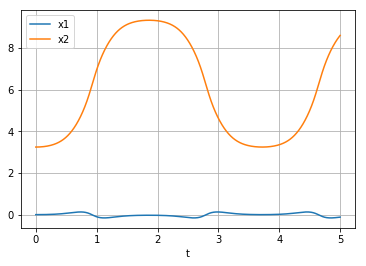

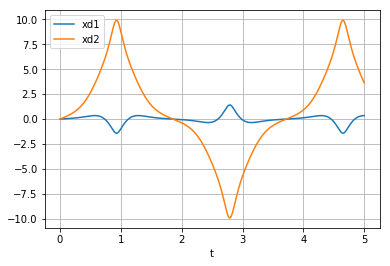

In [8]:
from pyro_solver import *
X0 = [0, np.pi+0.1, 0, 0]
t = np.linspace(0,5,1001)
sol=simulate(X0, t)

## Solving kinematics
Sometimes kinematics should be solved first, for example, in robotic manipulators. However, due to the simplicity of this model, this can be achieved after the dynamics has been solved. This section will be used for animation purposes. (In classical robotics, the kinematic equations help to derive the dynamics)

<img src="pendulumFrame.png" alt="Drawing" style="width: 400px;"/>

In [9]:
# Assumming the base coordinate is located at x = 0, with z pointing upward and x aligned with
# the movement of the cart
HCart = HomT('x', x1) # Coordinate frame wrt cart
HPend = HomT('x', x1) * HomR('z', -pi/2) * HomR('z', x2) # Coordinate frame wrt pendulum

In [10]:
# Calculating Important points for animation
# Assuming cart length is 0.1m
# Here there are two forms to get position from the homogeneous position vector
PCart1 = (HCart * PosH('x', -0.05))[0:3,0]
PCartCOM = (HCart * PosH('x', 0))[0:3,0]
PCart2 = (HCart * PosH('x', 0.05))[0:3,0]

PPend1 = Pos(0,HPend * PosH('x', 0))
PPendCOM = Pos(0,HPend * PosH('x',l))
PPend2 = Pos(0,HPend * PosH('x',2 * l))

animationMatrix = Matrix([PCart1.T, PCart2.T, PCartCOM.T, PPend1.T, PPendCOM.T, PPend2.T])
idCOM = [2, 4]
#print_python_kinematics(animationMatrix, X, parameters, values)

In [11]:
fireAnimation(animationMatrix, idCOM, X, sol, parameters, values, 0.005)

In [12]:
X

⎡x₁ ⎤
⎢   ⎥
⎢x₂ ⎥
⎢   ⎥
⎢xd₁⎥
⎢   ⎥
⎣xd₂⎦